<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 15, 2021

In [47]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#used describe function for data exploration
#df.describe(include = 'all')

In [ ]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [48]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,ConditionGroup,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [49]:
#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
#df.dropna(subset = ["Year"], inplace=True)
#df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year, Month, State
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year','Month','State','Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
#df = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
#df = df[~df.Group.str.contains('By Year|By Total', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
#df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
#df['Year'] = df['Year'].astype(int, errors = 'raise')
#df['Month'] = df['Month'].astype(int, errors = 'raise')

#combine Year and Month into one column
#df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#replace string values with midpoint values of type float
#df['AgeGroup']=df['AgeGroup'].str.replace('0-24','12.0')
#df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
#df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
#df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
#df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
#df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
#df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
#df['AgeGroup']=df['AgeGroup'].str.replace('+','')
#df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#replace condition with ICD numerical codes?
#df['Condition']=df['Condition'].str.replace('Adult respiratory distress syndrome','1.0')
#df['Condition']=df['Condition'].str.replace('Alzheimer disease','2.0')
#df['Condition']=df['Condition'].str.replace('COVID-19','3.0')
#df['Condition']=df['Condition'].str.replace('Cardiac arrest','4.0')
#df['Condition']=df['Condition'].str.replace('Cardiac arrhythmia','5.0')
#df['Condition']=df['Condition'].str.replace('Cerebrovascular diseases','6.0')
#df['Condition']=df['Condition'].str.replace('Chronic lower respiratory diseases','7.0')
#df['Condition']=df['Condition'].str.replace('Diabetes','8.0')
#df['Condition']=df['Condition'].str.replace('Heart failure','9.0')
#df['Condition']=df['Condition'].str.replace('Hypertensive diseases','10.0')
#df['Condition']=df['Condition'].str.replace('Influenza and pneumonia','11.0')
#df['Condition']=df['Condition'].str.replace('Intentional and unintentional injury, poisoning, and other adverse events','12.0')
#df['Condition']=df['Condition'].str.replace('Ischemic heart disease','13.0')
#df['Condition']=df['Condition'].str.replace('Malignant neoplasms','14.0')
#df['Condition']=df['Condition'].str.replace('Obesity','15.0')
#df['Condition']=df['Condition'].str.replace('Other diseases of the circulatory system','16.0')
#df['Condition']=df['Condition'].str.replace('Other diseases of the respiratory system','17.0')
#df['Condition']=df['Condition'].str.replace('Renal failure','18.0')
#df['Condition']=df['Condition'].str.replace('Respiratory arrest','19.0')
#df['Condition']=df['Condition'].str.replace('Respiratory failure','20.0')
#df['Condition']=df['Condition'].str.replace('Sepsis','21.0')
#df['Condition']=df['Condition'].str.replace('Vascular and unspecified dementia','22.0')
#df['Condition'] = df['Condition'].astype(float, errors = 'raise')

df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', 
                            columns=['Condition'])

df = pd.get_dummies(df, prefix='AgeGroup', prefix_sep='.', 
                            columns=['AgeGroup'])

df = df.reset_index(drop=True)
display(df)

,CV19_Deaths,Condition.Adult respiratory distress syndrome,Condition.Alzheimer disease,Condition.COVID-19,Condition.Cardiac arrest,Condition.Cardiac arrhythmia,Condition.Cerebrovascular diseases,Condition.Chronic lower respiratory diseases,Condition.Diabetes,Condition.Heart failure,Condition.Hypertensive diseases,Condition.Influenza and pneumonia,"Condition.Intentional and unintentional injury, poisoning, and other adverse events",Condition.Ischemic heart disease,Condition.Malignant neoplasms,Condition.Obesity,Condition.Other diseases of the circulatory system,Condition.Other diseases of the respiratory system,Condition.Renal failure,Condition.Respiratory arrest,Condition.Respiratory failure,Condition.Sepsis,Condition.Vascular and unspecified dementia,AgeGroup.0-24,AgeGroup.25-34,AgeGroup.35-44,AgeGroup.45-54,AgeGroup.55-64,AgeGroup.65-74,AgeGroup.75-84,AgeGroup.85+
0,443.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1999.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,5293.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,15615.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,39217.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47978,62.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47979,23.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47980,13.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47981,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#import numpy as np

#table = df.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
#display(table)

#import numpy as np

#table2 = df.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', fill_value = 0)
#display(table)

#pd.set_option('precision', 0)
#df_single_level_cols = df.pivot_table(index=['Condition'],columns=['State','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Condition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adult respiratory distress syndrome,390,0,2390,616,5956,1211,280,10,2980,1292,0,95,612,842,280,183,477,1974,0,716,970,994,734,833,677,0,88,2388,0,3402,173,3504,828,42,2009,259,105,1967,230,809,86,837,4862,299,0,690,626,181,201,0
Alzheimer disease,168,0,372,215,2696,366,174,45,792,472,0,46,587,621,331,103,207,168,11,131,314,507,631,147,458,12,58,23,11,403,60,463,443,92,968,341,135,957,72,158,136,320,1711,78,0,192,328,50,428,0
COVID-19,10825,178,15946,6043,65426,6961,8161,1546,35494,17929,292,2034,22450,13583,6014,4878,7537,9625,833,10283,13499,18477,7617,7580,11279,1504,2783,5715,1216,24529,4041,25296,13970,1508,22986,8500,2596,28441,2565,9142,1837,13219,55829,2360,116,11090,5598,2802,8180,519
Cardiac arrest,1422,0,1666,498,18613,163,902,0,2732,2403,0,0,533,658,225,296,329,389,0,207,1610,903,76,685,371,0,98,1161,12,5090,136,5983,1113,21,1896,354,0,1880,108,584,18,779,3622,14,0,189,221,54,45,0
Cardiac arrhythmia,507,0,816,283,4625,492,387,27,2493,740,0,71,1679,1211,412,223,698,397,10,901,744,938,821,345,631,69,247,146,53,1552,34,1377,807,69,1426,651,145,2437,94,839,105,863,4403,65,0,584,355,107,786,24
Cerebrovascular diseases,265,0,384,123,3164,305,204,22,1716,633,0,51,787,638,201,126,265,335,0,608,384,728,466,247,437,10,89,61,18,900,22,769,540,34,1122,397,67,1398,34,384,58,567,2490,15,0,327,139,13,416,0
Chronic lower respiratory diseases,632,0,985,397,4170,669,650,0,4381,974,0,122,2753,1580,510,325,798,561,0,899,912,1402,918,592,741,176,238,228,72,1233,184,1630,998,123,1898,1054,148,2355,167,756,172,1048,3946,80,0,627,399,204,1124,41
Diabetes,960,0,2196,659,14561,901,706,93,6882,1990,0,162,5517,1935,744,425,1266,1344,0,1809,994,1894,1351,1233,921,202,331,576,58,2467,506,2271,1501,122,2467,2014,252,3225,170,1038,264,1614,11045,185,0,968,796,207,1565,10
Heart failure,522,0,682,327,4298,500,614,24,1812,1031,0,114,2110,1177,483,263,702,543,11,669,1067,1213,919,645,685,50,203,142,40,1277,52,1413,937,128,1738,687,183,2373,189,725,164,778,3955,125,0,672,443,149,953,0


In [ ]:
#find a way to stack the dummy variable columns and then find a way to use corr for the 3 variables CVDeaths, AgeGroup(stacked) and Condition(Stacked)

#pd.set_option('precision', 0)
#df_single_level_cols = ndf.pivot_table(index=['Condition'],columns=['Condition','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#s2 = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

KeyError: ignored

In [55]:
#combined dataframe using float values for Age Group and maybe condition?
corr = df.corr()
#print(corr)
display(corr)


,CV19_Deaths,Condition.Adult respiratory distress syndrome,Condition.Alzheimer disease,Condition.COVID-19,Condition.Cardiac arrest,Condition.Cardiac arrhythmia,Condition.Cerebrovascular diseases,Condition.Chronic lower respiratory diseases,Condition.Diabetes,Condition.Heart failure,Condition.Hypertensive diseases,Condition.Influenza and pneumonia,"Condition.Intentional and unintentional injury, poisoning, and other adverse events",Condition.Ischemic heart disease,Condition.Malignant neoplasms,Condition.Obesity,Condition.Other diseases of the circulatory system,Condition.Other diseases of the respiratory system,Condition.Renal failure,Condition.Respiratory arrest,Condition.Respiratory failure,Condition.Sepsis,Condition.Vascular and unspecified dementia,AgeGroup.0-24,AgeGroup.25-34,AgeGroup.35-44,AgeGroup.45-54,AgeGroup.55-64,AgeGroup.65-74,AgeGroup.75-84,AgeGroup.85+
CV19_Deaths,1.000000,-0.011011,-0.008581,0.075063,-0.005256,-0.009721,-0.012421,-0.010443,-0.005273,-0.010468,-0.000158,0.023090,-0.012359,-0.007586,-0.013121,-0.013127,-0.013149,-0.013201,-0.010152,-0.011269,0.015959,-0.010542,-0.003172,-0.011194,-0.014221,-0.017280,-0.017896,-0.009311,0.006016,0.014038,0.017522
Condition.Adult respiratory distress syndrome,-0.011011,1.000000,-0.033607,-0.079171,-0.050151,-0.045577,-0.042832,-0.049685,-0.057165,-0.047053,-0.057703,-0.069930,-0.033206,-0.050565,-0.043373,-0.041083,-0.047808,-0.041972,-0.051981,-0.031957,-0.066630,-0.051552,-0.042860,0.000445,0.006119,0.007986,0.020556,0.024319,0.012880,-0.012739,-0.041907
Condition.Alzheimer disease,-0.008581,-0.033607,1.000000,-0.049578,-0.031405,-0.028541,-0.026822,-0.031113,-0.035797,-0.029465,-0.036134,-0.043790,-0.020794,-0.031664,-0.027161,-0.025726,-0.029938,-0.026283,-0.032551,-0.020012,-0.041724,-0.032282,-0.026839,-0.015477,-0.022834,-0.029636,-0.040694,-0.052510,-0.029348,0.039148,0.091193
Condition.COVID-19,0.075063,-0.079171,-0.049578,1.000000,-0.073982,-0.067235,-0.063185,-0.073294,-0.084330,-0.069412,-0.085123,-0.103160,-0.048986,-0.074593,-0.063984,-0.060605,-0.070526,-0.061917,-0.076682,-0.047142,-0.098292,-0.076050,-0.063226,0.033268,0.053071,0.063932,0.047225,0.008911,-0.026299,-0.040459,-0.034888
Condition.Cardiac arrest,-0.005256,-0.050151,-0.031405,-0.073982,1.000000,-0.042590,-0.040024,-0.046428,-0.053419,-0.043969,-0.053921,-0.065346,-0.031030,-0.047251,-0.040531,-0.038390,-0.044674,-0.039221,-0.048574,-0.029862,-0.062263,-0.048174,-0.040051,-0.000166,0.005952,0.007097,0.010052,0.007065,0.002935,-0.008006,-0.013796
Condition.Cardiac arrhythmia,-0.009721,-0.045577,-0.028541,-0.067235,-0.042590,1.000000,-0.036374,-0.042194,-0.048547,-0.039959,-0.049003,-0.059387,-0.028200,-0.042941,-0.036834,-0.034889,-0.040600,-0.035644,-0.044144,-0.027139,-0.056584,-0.043780,-0.036398,-0.006386,-0.013773,-0.028413,-0.029055,-0.019088,-0.000857,0.023898,0.034979
Condition.Cerebrovascular diseases,-0.012421,-0.042832,-0.026822,-0.063185,-0.040024,-0.036374,1.000000,-0.039652,-0.045623,-0.037552,-0.046052,-0.055810,-0.026501,-0.040355,-0.034616,-0.032788,-0.038155,-0.033497,-0.041485,-0.025504,-0.053176,-0.041143,-0.034206,-0.002043,-0.013162,-0.019363,-0.018005,-0.007131,0.004696,0.013549,0.015830
Condition.Chronic lower respiratory diseases,-0.010443,-0.049685,-0.031113,-0.073294,-0.046428,-0.042194,-0.039652,1.000000,-0.052922,-0.043560,-0.053420,-0.064739,-0.030741,-0.046811,-0.040154,-0.038033,-0.044259,-0.038857,-0.048123,-0.029585,-0.061684,-0.047726,-0.039678,-0.002646,-0.013904,-0.025909,-0.026236,-0.004002,0.015171,0.016977,0.008898
Condition.Diabetes,-0.005273,-0.057165,-0.035797,-0.084330,-0.053419,-0.048547,-0.045623,-0.052922,1.000000,-0.050119,-0.061463,-0.074486,-0.035370,-0.053860,-0.046200,-0.043760,-0.050923,-0.044707,-0.055368,-0.034039,-0.070972,-0.054912,-0.045652,-0.005940,-0.009088,0.005559,0.009563,0.012161,0.010551,-0.005945,-0.019670
Condition.Heart failure,-0.010468,-0.047053,-0.029465,-0.069412,-0.043969,-0.039959,-0.037552,-0.043560,-0.050119,1.000

In [51]:
#combined data set
import numpy as np
print(df.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(df.corr().abs().nlargest(3, 'CV19_Deaths').values[:13])

Index(['CV19_Deaths', 'Condition.COVID-19',
       'Condition.Influenza and pneumonia'],
      dtype='object')
[[1.00000000e+00 1.10114669e-02 8.58131698e-03 7.50634256e-02
  5.25574617e-03 9.72067584e-03 1.24205242e-02 1.04426815e-02
  5.27274430e-03 1.04679750e-02 1.57614002e-04 2.30900773e-02
  1.23585406e-02 7.58640918e-03 1.31213195e-02 1.31269023e-02
  1.31494674e-02 1.32011000e-02 1.01523296e-02 1.12688347e-02
  1.59587851e-02 1.05421594e-02 3.17197808e-03 1.11944358e-02
  1.42213991e-02 1.72799486e-02 1.78959141e-02 9.31109061e-03
  6.01643977e-03 1.40384961e-02 1.75215516e-02]
 [7.50634256e-02 7.91711177e-02 4.95775270e-02 1.00000000e+00
  7.39820636e-02 6.72348115e-02 6.31850832e-02 7.32943633e-02
  8.43298631e-02 6.94118020e-02 8.51228892e-02 1.03159619e-01
  4.89856670e-02 7.45929552e-02 6.39841283e-02 6.06052477e-02
  7.05258767e-02 6.19173823e-02 7.66821940e-02 4.71423703e-02
  9.82921815e-02 7.60497464e-02 6.32262727e-02 3.32675467e-02
  5.30712365e-02 6.39319014e-02 4.7

Text(0, 0.5, 'CV19_Deaths')

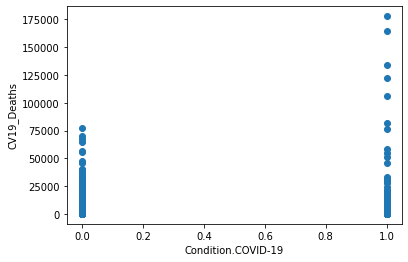

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt.scatter(df['Condition'], df['CV19_Deaths'], marker='o')
plt.scatter(df['Condition.COVID-19'], df['CV19_Deaths'], marker='o')
#plt.xlabel('Condition')
plt.xlabel('Condition.COVID-19')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

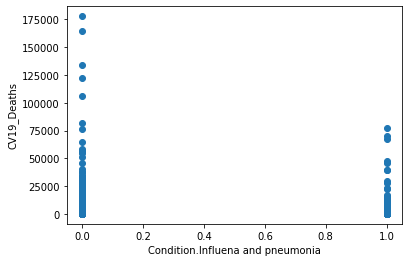

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt.scatter(df['AgeGroup'], df['CV19_Deaths'], marker='o')
plt.scatter(df['Condition.Influenza and pneumonia'], df['CV19_Deaths'], marker='o')
#plt.xlabel('AgeGroup')
plt.xlabel('Condition.Influena and pneumonia')
plt.ylabel('CV19_Deaths')

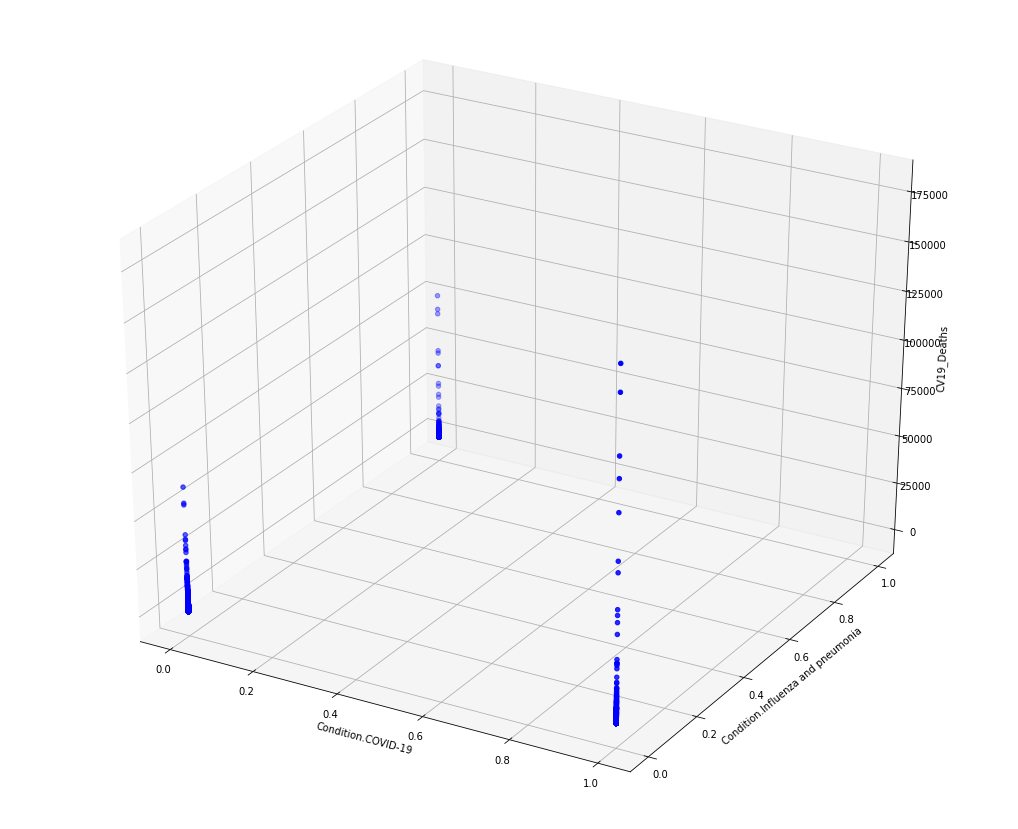

In [57]:
#full data frame with dummy colums
import numpy as np

%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(df['Condition'],
#          df['AgeGroup'],
#          df['CV19_Deaths'],
#          c='b')

ax.scatter(df['Condition.COVID-19'],
          df['Condition.Influenza and pneumonia'],
          df['CV19_Deaths'],
          c='b')


#ax.set_xlabel("Condition")
#ax.set_ylabel("AgeGroup")
ax.set_xlabel("Condition.COVID-19")
ax.set_ylabel("Condition.Influenza and pneumonia")

ax.set_zlabel("CV19_Deaths")
plt.show()


In [58]:
#Train the AgeGroup Model
#Create DataFrames to train model
#x = pd.DataFrame(np.c_[df['Condition'], df['AgeGroup']], columns = ['Condition','AgeGroup'])
x = pd.DataFrame(np.c_[df['Condition.COVID-19'], df['Condition.Influenza and pneumonia']], columns = ['Condition.COVID-19','Condition.Influenza and pneumonia'])
Y = df['CV19_Deaths']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

#print train set
print(x_train.shape)
print(Y_train.shape)

(33588, 2)
(33588,)


In [59]:
#print test shape
print(x_test.shape)
print(Y_test.shape)

(14395, 2)
(14395,)


In [60]:
#train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
#make age prediction
age_pred = model.predict(x_test)

print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.0026


3222733.052040532


Text(0.5, 1.0, 'Actual Age vs Predicted Age')

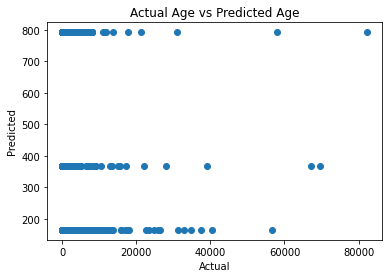

In [62]:
#show actual age vs predicted age
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, age_pred)
print(mse)

plt.scatter(Y_test, age_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Age vs Predicted Age")

In [63]:
print(model.intercept_)
print(model.coef_)

165.26372057262114
[627.06152215 201.89387048]


In [64]:
print(model.predict([[2.0, 85.0]]))

[18580.365756]


In [ ]:
#Begin Logistic model - Can we predict death by using age and condition based on given CV-19 death data?

